In [ ]:
# For licensing see accompanying LICENSE file.
# Copyright (C) 2025 Apple Inc. All Rights Reserved.

# Demo experiment

A simple experiment based on OpenAI API to test your installation of the ageval experimental pipeline. First, we run the actual experiment using the CLI command below (the `!` means you can run it inside a notebook):

In [ ]:
! cd ../.. && ageval -m -cd "./exp/configs/0001_truthful_qa_openai_test"

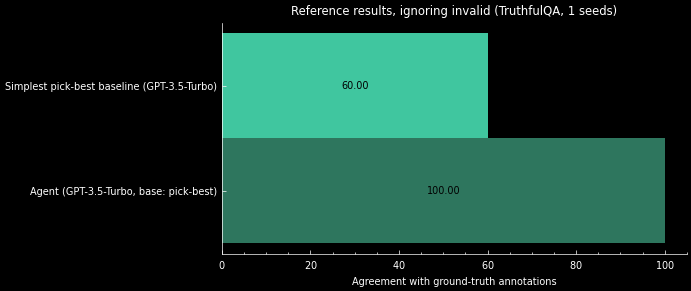

In [1]:
# Now visualising the results ourselves using the `data_loader` and `plotting` modules

import ageval.analysis.data_loader
import ageval.analysis.plotting

# ADD PATH TO YOUR EXPERIMENT RESULTS HERE
# Should be latest directory under '../multirun/<TODAY>/<TIME-OF-EXP-START>'
EXPERIMENT_LOG_PATH = "../../multirun/2024-08-22/16-12-53"

# Get results in dict, separated by datapath
# For us, each dict has a single key.
annotation_dfs, metric_dfs, results_dicts = ageval.analysis.data_loader.load_experiments_from_multirun(EXPERIMENT_LOG_PATH)

metric_df = metric_dfs["./data/external/truthful_qa/truthful_qa_5.csv"]

# create the actual plots
ageval.analysis.plotting.plot_runs(
    df=metric_df, 
    file_name=None, # don't save to file for demo
    close_figures=False, # to make sure shown in notebook
    title="Reference results, ignoring invalid (TruthfulQA)", 
    group_baseline_agent=True, # this move the baseline right next to the agent
)

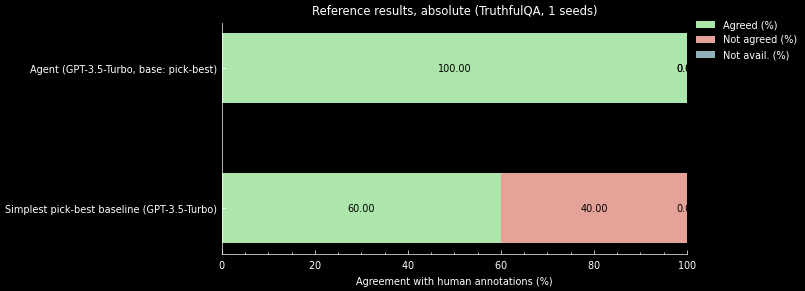

In [2]:
# generating a second plot that explicitly 
# states the percentage of non-agreed and 
# non-available annotations
ageval.analysis.plotting.plot_runs(
    df=metric_df, 
    file_name=None, # don't save to file for demo
    close_figures=False, # to make sure shown in notebook
    title="Reference results, absolute (TruthfulQA)", 
    x_label="Agreement with human annotations (%)",
    metrics=["Agreed (%)", "Not agreed (%)", "Not avail. (%)"],
    colors_per_metric=["#ACE6AB","#E5A298","#8EB2B8"],
    add_legend=True,
    legend_kwargs=dict(bbox_to_anchor=(1.0, 1.05)),
)

In [3]:
metric_df

,model,Agreement rate,Agreement rate (incl NAs),Agreed,Not agreed,Num text_a evaluator pref,Num text_b evaluator pref,No evaluator annotation available,Not avail.,Sum,Agreed (%),Not agreed (%),Not avail. (%)
0,basic_gpt-3.5-turbo-0125,0.6,0.6,3,2,2,3,0,0,5,60.0,40.0,0.0
1,agent_gpt-3.5-turbo-0125_fact_check_code_inter...,1.0,1.0,5,0,2,3,0,0,5,100.0,0.0,0.0
